# Parcial Final – Análisis de Datos para Redes Sociales  
### Shein vs Temu – Guía de Preguntas de Negocio

Este cuaderno está diseñado para acompañar el **parcial final**.  
No contiene las soluciones, sino una **secuencia de preguntas de negocio** que debes ir respondiendo a partir de tus análisis en Python (celdas de código) y tus conclusiones (texto).

> **Instrucción general:**  
> - Debajo de cada bloque de preguntas encontrarás una celda vacía de código para que hagas el análisis.  
> - Después de tu código, agrega una celda de texto (Markdown) con tus respuestas e interpretaciones de negocio.


In [ ]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv

--2025-11-27 16:05:08--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv [following]
--2025-11-27 16:05:08--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760315 (1.7M) [text/plain]
Saving to: ‘shein.csv.2’

shein.csv.2         100%[===================>]   1.68M  --.-KB/s    in 0.01s   

2025-11-27 16:05:08 (

In [3]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv

--2025-11-27 17:01:29--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv [following]
--2025-11-27 17:01:29--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346171 (338K) [text/plain]
Saving to: ‘temu.csv.1’

temu.csv.1          100%[===================>] 338.06K  --.-KB/s    in 0.006s  

2025-11-27 17:01:29 (56.5 

## 2. Ingesta y Unificación de Datos  
**Objetivo de negocio:** asegurar que estamos comparando peras con peras (Shein vs Temu en una misma tabla limpia).


### 2.1. Preguntas de negocio

1. **Foto grande del dataset**
   - ¿Cuántas publicaciones tenemos de Shein y cuántas de Temu?
   - ¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?

2. **Comparabilidad**
   - Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?  
   - ¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?

3. **Estructura de la tabla unificada**
   - En el dataframe final unificado (por ejemplo, `df`), ¿qué columnas consideras **clave de negocio** para comparar marcas? (ej: `brand`, `likes`, `comments`, `views`, `published_at`, etc.).  
   - Si una columna no existe en una de las dos fuentes (por ejemplo, `views` solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?

4. **Representatividad**
   - ¿El periodo de tiempo cubierto en Shein y Temu es el mismo?  
   - Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?


In [4]:
import pandas as pd
df_shein = pd.read_csv('shein.csv')
df_shein['brand'] = 'Shein'
display(df_shein.head())

,alt,audioUrl,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,...,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount,brand
0,"Photo by shein_co on November 25, 2025. May be...",NaN,¿De compras para encontrar las mejores ofertas...,"Photo by shein_co on November 25, 2025. May be...",NaN,0.0,1350.0,1080.0,https://scontent-atl3-2.cdninstagram.com/v/t51...,NaN,...,NaN,DRetnrflmeB,2025-11-25T12:46:02.000Z,Sidecar,https://www.instagram.com/p/DRetnrflmeB/,NaN,NaN,NaN,NaN,Shein
1,"Photo by shein_co on September 26, 2025. May b...",NaN,Recién recogido y fabuloso—¿qué vestido es tu ...,"Photo by shein_co on September 26, 2025. May b...",NaN,0.0,1350.0,1080.0,https://scontent-hou1-1.cdninstagram.com/v/t51...,NaN,...,NaN,DPEXbp5jtSe,2025-09-26T14:08:01.000Z,Sidecar,https://www.instagram.com/p/DPEXbp5jtSe/,NaN,NaN,NaN,NaN,Shein
2,"Photo by shein_co on October 03, 2025. May be ...",NaN,"Una energía de un solo tono, esa flexión codif...","Photo by shein_co on October 03, 2025. May be ...",NaN,0.0,1350.0,1080.0,https://scontent-ord5-2.cdninstagram.com/v/t51...,NaN,...,NaN,DPWh7lTASw0,2025-10-03T15:26:01.000Z,Sidecar,https://www.instagram.com/p/DPWh7lTASw0/,NaN,NaN,NaN,NaN,Shein
3,"Photo by shein_co on November 26, 2025. May be...",NaN,"Todo lo que escuchamos fue ""quédate en casa"" y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DRhbjBhgaUs,2025-11-26T14:06:02.000Z,Image,https://www.instagram.com/p/DRhbjBhgaUs/,NaN,NaN,NaN,NaN,Shein
4,"Photo by shein_co on September 19, 2025. May b...",NaN,La única necesidad que tengo para poder termin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DOycs74DXgF,2025-09-19T15:08:01.000Z,Image,https://www.instagram.com/p/DOycs74DXgF/,NaN,NaN,NaN,NaN,Shein


In [5]:
df_temu = pd.read_csv('temu.csv')
df_temu['brand'] = 'Temu'
display(df_temu.head())

,alt,audioUrl,caption,commentsCount,dimensionsHeight,dimensionsWidth,displayUrl,firstComment,hashtags/0,hashtags/1,...,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount,brand
0,"Photo by TemuColombia on July 11, 2025.",NaN,¡Alerta de promoción! Descubre productos que s...,15,1080,1080,https://scontent-lax7-1.cdninstagram.com/v/t51...,🤬🤬🤬TENGO UN PAQUETE PARA DEVOLUCIÓN ESPERANDO ...,NaN,NaN,...,NaN,DL9iB1-tcFn,2025-07-11T08:51:09.000Z,Image,https://www.instagram.com/p/DL9iB1-tcFn/,NaN,NaN,NaN,NaN,Temu
1,NaN,https://scontent-iad3-1.cdninstagram.com/o1/v/...,❤️❤️Valen mucho la pena⏰ #temu #compraentemu ...,1,1920,1080,https://scontent-iad3-1.cdninstagram.com/v/t51...,Lindas!,temu,compraentemu,...,clips,DRUUa95DAvf,2025-11-21T11:52:32.000Z,Video,https://www.instagram.com/p/DRUUa95DAvf/,16.939,26146.0,https://scontent-iad3-1.cdninstagram.com/o1/v/...,7599.0,Temu
2,NaN,https://scontent-lga3-1.cdninstagram.com/o1/v/...,❤️❤️Valen mucho la pena⏰ #temu #compraentemu ...,7,1920,1080,https://scontent-lga3-2.cdninstagram.com/v/t51...,Que tamaño tienen los papa noeles que suben y...,temu,compraentemu,...,clips,DRUUc2Pj6a8,2025-11-21T11:52:27.000Z,Video,https://www.instagram.com/p/DRUUc2Pj6a8/,13.845,20891.0,https://scontent-lga3-3.cdninstagram.com/o1/v/...,5273.0,Temu
3,NaN,https://scontent-lga3-2.cdninstagram.com/o1/v/...,¡Los aperitivos reinventados! Nuestro anillo d...,359,1333,750,https://scontent-lga3-3.cdninstagram.com/v/t51...,🤬🤬🤬TENGO UN PAQUETE PARA DEVOLUCIÓN ESPERANDO ...,temu,NaN,...,clips,C4uC0VShghw,2024-03-20T02:33:20.000Z,Video,https://www.instagram.com/p/C4uC0VShghw/,8.933,615177.0,https://scontent-lga3-2.cdninstagram.com/o1/v/...,262119.0,Temu
4,"Photo by TemuColombia on July 11, 2025.",NaN,Alerta de Rebajas💥 ¡No te pierdas el Gran Even...,75,1080,1080,https://scontent-dfw5-1.cdninstagram.com/v/t51...,100% falso este servicio pésimo,temu,hallazgostemu,...,NaN,DL9iB55Nskv,2025-07-11T08:51:10.000Z,Image,https://www.instagram.com/p/DL9iB55Nskv/,NaN,NaN,NaN,NaN,Temu


In [6]:
df = pd.concat([df_shein, df_temu], ignore_index=True)
display(df.head())
display(df.tail())

,alt,audioUrl,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,...,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount,brand
0,"Photo by shein_co on November 25, 2025. May be...",NaN,¿De compras para encontrar las mejores ofertas...,"Photo by shein_co on November 25, 2025. May be...",NaN,0.0,1350.0,1080.0,https://scontent-atl3-2.cdninstagram.com/v/t51...,NaN,...,NaN,DRetnrflmeB,2025-11-25T12:46:02.000Z,Sidecar,https://www.instagram.com/p/DRetnrflmeB/,NaN,NaN,NaN,NaN,Shein
1,"Photo by shein_co on September 26, 2025. May b...",NaN,Recién recogido y fabuloso—¿qué vestido es tu ...,"Photo by shein_co on September 26, 2025. May b...",NaN,0.0,1350.0,1080.0,https://scontent-hou1-1.cdninstagram.com/v/t51...,NaN,...,NaN,DPEXbp5jtSe,2025-09-26T14:08:01.000Z,Sidecar,https://www.instagram.com/p/DPEXbp5jtSe/,NaN,NaN,NaN,NaN,Shein
2,"Photo by shein_co on October 03, 2025. May be ...",NaN,"Una energía de un solo tono, esa flexión codif...","Photo by shein_co on October 03, 2025. May be ...",NaN,0.0,1350.0,1080.0,https://scontent-ord5-2.cdninstagram.com/v/t51...,NaN,...,NaN,DPWh7lTASw0,2025-10-03T15:26:01.000Z,Sidecar,https://www.instagram.com/p/DPWh7lTASw0/,NaN,NaN,NaN,NaN,Shein
3,"Photo by shein_co on November 26, 2025. May be...",NaN,"Todo lo que escuchamos fue ""quédate en casa"" y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DRhbjBhgaUs,2025-11-26T14:06:02.000Z,Image,https://www.instagram.com/p/DRhbjBhgaUs/,NaN,NaN,NaN,NaN,Shein
4,"Photo by shein_co on September 19, 2025. May b...",NaN,La única necesidad que tengo para poder termin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DOycs74DXgF,2025-09-19T15:08:01.000Z,Image,https://www.instagram.com/p/DOycs74DXgF/,NaN,NaN,NaN,NaN,Shein


,alt,audioUrl,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,...,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount,brand
223,NaN,https://scontent-lga3-1.cdninstagram.com/o1/v/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,clips,C4f9C6do2k7,2024-03-14T15:13:55.000Z,Video,https://www.instagram.com/p/C4f9C6do2k7/,12.333,335804.0,https://scontent-lga3-1.cdninstagram.com/o1/v/...,189107.0,Temu
224,NaN,https://scontent-lga3-1.cdninstagram.com/o1/v/...,Pinta tu mundo con tonos vibrantes a través de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,clips,C4r-82kIdL4,2024-03-19T07:21:11.000Z,Video,https://www.instagram.com/p/C4r-82kIdL4/,29.040,365322.0,https://scontent-lga3-2.cdninstagram.com/o1/v/...,160436.0,Temu
225,NaN,https://scontent-mia3-2.cdninstagram.com/o1/v/...,¡Sube de nivel tu maquillaje diario con estas ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,clips,C4sIDVQPsad,2024-03-19T08:40:38.000Z,Video,https://www.instagram.com/p/C4sIDVQPsad/,23.266,385531.0,https://scontent-mia5-1.cdninstagram.com/o1/v/...,162918.0,Temu
226,NaN,https://scontent-ord5-1.cdninstagram.com/o1/v/...,¡Organiza tus perfumes como un profesional y m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,clips,C4sADEfPa-x,2024-03-19T07:30:39.000Z,Video,https://www.instagram.com/p/C4sADEfPa-x/,6.541,455416.0,https://scontent-ord5-3.cdninstagram.com/o1/v/...,175936.0,Temu
227,NaN,https://instagram.fcha1-1.fna.fbcdn.net/o1/v/t...,Dile adiós a las molestas pelusas y hola al co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,clips,C4sLhZkJ_QH,2024-03-19T09:10:56.000Z,Video,https://www.instagram.com/p/C4sLhZkJ_QH/,19.166,403807.0,https://instagram.fcha1-1.fna.fbcdn.net/o1/v/t...,127829.0,Temu


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Columns: 634 entries, alt to brand
dtypes: bool(2), float64(346), int64(6), object(280)
memory usage: 1.1+ MB


In [8]:
print('--- Shein DataFrame Info ---')
df_shein_filtered = df[df['brand'] == 'Shein']
df_shein_filtered.info()

--- Shein DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Columns: 634 entries, alt to brand
dtypes: bool(2), float64(346), int64(6), object(280)
memory usage: 989.5+ KB


In [9]:
print('\n--- Temu DataFrame Info ---')
df_temu_filtered = df[df['brand'] == 'Temu']
df_temu_filtered.info()


--- Temu DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 200 to 227
Columns: 634 entries, alt to brand
dtypes: bool(2), float64(346), int64(6), object(280)
memory usage: 138.5+ KB


Comparabilidad

Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?

Debido a que no hay una correlación equitativa referente a dichas categorías, ya que puede ser evidente qeu en cuanto más contenido tiene una marca es mayor el número de likes o de post.

¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?
Estructura de la tabla unificada

Que podríamos destinar recursos sin optimizar las campañas según la cantidad de métricas clave que nos pueden ayudar a destinar mejor los recursos.

En el dataframe final unificado (por ejemplo, df), ¿qué columnas consideras clave de negocio para comparar marcas? (ej: brand, likes, comments, views, published_at, etc.).

Comentarios, ya que podemos identificar los tonos comunicativosa que estan manejando las personas con la amrca, la cantidad de interacciones como likes, y publicidad.

Si una columna no existe en una de las dos fuentes (por ejemplo, views solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?
¿El periodo de tiempo cubierto en Shein y Temu es el mismo?
Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?

## 3. Limpieza de Métricas  
**Objetivo de negocio:** asegurar que las métricas que usamos representen realidad y no errores de scraping o outliers raros.

### 3.1. Preguntas de negocio

1. **Datos faltantes**
   - ¿Qué porcentaje de posts tiene valores faltantes en métricas clave (ej. `likes`, `comments`, `views`)?  
   - Desde el punto de vista de negocio, ¿qué harías con esos posts: los excluirías, los imputarías o los analizarías aparte? ¿Por qué?

   El 53.95% de videoViewCount está ausente. Excluir tantos posts reduciría significativamente nuestro dataset, especialmente para Temu. Imputar valores podría generar datos falsos y decisiones erróneas. Mi recomendación es un análisis segmentado: investigar por qué falta ese dato (¿son posts de imagen que no tienen vistas de video?) y usar likesCount y commentsCount (que están completos) para comparaciones generales. Solo analizar videoViewCount cuando esté disponible para contenido de video, manteniendo la transparencia sobre las limitaciones de los datos. Esta estrategia es la más fiable y evita sesgos.


2. **Outliers**
   - Identifica algunos posts con números extremadamente altos de likes o views.  
   - ¿Crees que son orgánicos o podrían ser campañas pagas / virales específicos?
Podemos identificar con respecto a unnúmero alto fuera del promedio de likes con desproporción de comentarios podemos identificar un efecto de viralidad, o utilización de segmentación espcifica para conseguir un objetivo en campañas de ADS. También con respecto a Outliers de comentarios, podemos ver una alta interacción en dichas publicaciones.
   - ¿Cómo cambia tu lectura si incluyes vs. excluyes estos outliers?

Incluyendo outliers: Tendrás métricas promedio infladas, mostrando el potencial máximo o viral de la marca. Esto puede llevar a expectativas irreales sobre el rendimiento diario, pero es útil para entender qué puede funcionar.

Excluyendo outliers: Las métricas promedio serán más realistas y representativas del rendimiento consistente de la marca. Esto ayuda a establecer objetivos más sensatos y a entender la eficiencia del contenido regular, aunque podrías perder lecciones de lo que causó el éxito de los picos.

3. **Calidad de la métrica**
   - Si un post tiene 0 comments pero muchos likes, ¿qué hipótesis de negocio podrías plantear sobre ese tipo de contenido o audiencia?  
Podemos plantear que es debido a una viralidad superficiar sin embargo que genera poca interacción profunda de conversación hacia la marca, sin embargo es un contenido con potencial.

   - ¿Qué te preocupa más como inversor: muchos likes con poco comentario, o pocos likes pero una tasa de comentarios alta? Explica.

   Como inversor, me preocuparía más muchos likes con pocos comentarios. Esto suele ser engagement superficial y fácil de inflar.

Prefiero pocos likes pero una tasa de comentarios alta. Esto indica una comunidad más comprometida y un engagement profundo, lo que es más valioso a largo plazo para la lealtad y la marca.


In [10]:
key_metrics = ['likesCount', 'commentsCount', 'videoViewCount'] # Assuming these are the column names for likes, comments, and views

print('Porcentaje de posts con valores faltantes en métricas clave:')

for metric in key_metrics:
    if metric in df.columns:
        missing_percentage = (df[metric].isnull().sum() / len(df)) * 100
        print(f'- {metric}: {missing_percentage:.2f}%')
    else:
        print(f'- La métrica "{metric}" no se encontró en el DataFrame.')

Porcentaje de posts con valores faltantes en métricas clave:
- likesCount: 0.00%
- commentsCount: 0.00%
- videoViewCount: 53.95%


In [11]:
df_cleaned = df.dropna(subset=['timestamp']).copy()
print('\nNumber of null values in timestamp column after cleaning:')
print(df_cleaned['timestamp'].isnull().sum())
print(f'Original DataFrame shape: {df.shape}')
print(f'Cleaned DataFrame shape: {df_cleaned.shape}')
df = df_cleaned.copy()


Number of null values in timestamp column after cleaning:
0
Original DataFrame shape: (228, 634)
Cleaned DataFrame shape: (228, 634)


In [12]:
print('Number of null values in timestamp column before cleaning:')
print(df['timestamp'].isnull().sum())

Number of null values in timestamp column before cleaning:
0


In [13]:
print('--- Outlier Analysis for likesCount ---')
mean_likes = df['likesCount'].mean()
std_likes = df['likesCount'].std()
threshold_likes = mean_likes + (3 * std_likes)

outliers_likes = df[df['likesCount'] > threshold_likes].sort_values(by='likesCount', ascending=False)
print(f'Posts with likesCount > {threshold_likes:.2f} (mean + 3*std):')
display(outliers_likes[['brand', 'likesCount', 'commentsCount', 'caption']].head())

print('\n--- Outlier Analysis for commentsCount ---')
mean_comments = df['commentsCount'].mean()
std_comments = df['commentsCount'].std()
threshold_comments = mean_comments + (3 * std_comments)

outliers_comments = df[df['commentsCount'] > threshold_comments].sort_values(by='commentsCount', ascending=False)
print(f'Posts with commentsCount > {threshold_comments:.2f} (mean + 3*std):')
display(outliers_comments[['brand', 'likesCount', 'commentsCount', 'caption']].head())

--- Outlier Analysis for likesCount ---
Posts with likesCount > 19944.29 (mean + 3*std):


,brand,likesCount,commentsCount,caption
191,Shein,69638,33,"Vuela alto y si te caes, levántate y sigue int..."
193,Shein,29574,3,Conjuntos que elevan tu look al instante ✨ @so...
177,Shein,28171,0,La magia está en los detalles. Inspírate y con...
189,Shein,26197,2,Esta es la señal que estabamos esperando 😍 Sum...



--- Outlier Analysis for commentsCount ---
Posts with commentsCount > 591.49 (mean + 3*std):


,brand,likesCount,commentsCount,caption
110,Shein,1047,2270,"Nueva temporada, nuevos looks y… ¡nuevas sorpr..."
211,Temu,6496,1500,¡Empieza el día con energía! 🌱💪 ¡Recárgate y e...


In [14]:
brand_counts = df['brand'].value_counts()
print(brand_counts)

brand
Shein    200
Temu      28
Name: count, dtype: int64


## 4. Creación de KPIs de Negocio  
**Objetivo:** pasar de métricas vanidosas (likes brutos) a métricas de eficiencia (engagement).

Supongamos que creas un indicador como:

\>
\> `engagement_rate = (likes + comments) / views`  
\> *(ajústalo si tu dataset usa otras métricas)*

### 4.1. Preguntas de negocio

1. **Definición de eficiencia**
   - En tus palabras: ¿qué es “eficiencia” en una estrategia de contenido?
   Eficiencia es alcanzar los objetivos planteados con la menor cantidad de recursos utilizados. En una estrategia de contenido es optener los mayores resultados con la utlización efectiva de las acciones y recursos.
   - ¿Por qué `engagement_rate` puede ser mejor indicador que los `likes` totales para comparar dos marcas con tamaños y volúmenes distintos?

   Esto debido a que convierte un promedio ponderado, en vez de comparar datos brutos sin tener en cuenta los tamaños de audiencia de cada marca y su repercusión en las métricas.

2. **Comparación entre marcas**
   - Calculando el `engagement_rate` medio y mediano de Shein vs Temu:
     - ¿Cuál de las dos marcas parece **más eficiente** captando atención real por post?
Shein se muestra con mayor eficiencia ya que tiene mayor consistencia en el engagement rate y justamente en más alto en comparación con Temu.

     - Si fueras un fondo de inversión, ¿este dato te haría mirar con mejores ojos a una de las dos? ¿Por qué?
Si evidentemente me haría mirar con mejores ojos a Shein ya que tiene un mayor porcentaje de engagement lo cual muestra una comunidad mayormente comprometida y una empresa que generar una alta fidelización de sus clientes.

3. **Distribución del engagement**
   - Mirando la distribución (por ejemplo, un boxplot) del engagement por marca:
     - ¿Shein tiene más posts “mediocres” y unos pocos muy buenos?
No exactamente, tiene un promedio constante de calidad en sus contenidos, sin embargo cuenta con outliers que extienden el promedio de las métricas de contenido.

     - ¿Temu tiene menos posts pero más consistentes?
Si consta co menos post, consistentes, sin embargo no más consistentes que Shein ya que este también constan con una buena consistencia.

     - ¿Qué tipo de distribución preferirías si fueras CMO?
Como CMO, preferiría una distribución con un engagement promedio consistente y alto en un volumen razonable de contenido. Esto es más predecible, escalable y construye mejor la marca a largo plazo que depender de unos pocos éxitos virales.

4. **Trade-off volumen vs eficiencia**
   - Si Shein publica mucho más, pero su engagement promedio es menor:
     - ¿Crees que están “quemando” a la audiencia con exceso de contenido?
     - ¿O puede ser una estrategia deliberada de saturación que igual les funciona?

Considero que es necesario tener una constancia de contenido como marca, aunque es necesario manejar otras estrategias de contenido que hagan participativa la interacción con los usuarios para que no se genere una saturación de la comunidad con contenido repetitivo.

In [15]:
# Fill NaN videoViewCount with 0 to handle cases where posts might not be videos or views are genuinely 0
df['videoViewCount_filled'] = df['videoViewCount'].fillna(0)

# Calculate engagement rate, handling division by zero
df['engagement_rate'] = df.apply(
    lambda row: (row['likesCount'] + row['commentsCount']) / row['videoViewCount_filled'] if row['videoViewCount_filled'] > 0 else 0,
    axis=1
)

# Drop the temporary filled column if not needed for further analysis
df = df.drop(columns=['videoViewCount_filled'])

display(df[['brand', 'likesCount', 'commentsCount', 'videoViewCount', 'engagement_rate']].head())

,brand,likesCount,commentsCount,videoViewCount,engagement_rate
0,Shein,23,0,NaN,0.0
1,Shein,141,13,NaN,0.0
2,Shein,178,17,NaN,0.0
3,Shein,208,5,NaN,0.0
4,Shein,106,5,NaN,0.0


In [16]:
print('Engagement Rate by Brand:')
engagement_by_brand = df.groupby('brand')['engagement_rate'].agg(['mean', 'median'])
display(engagement_by_brand)

Engagement Rate by Brand:


,mean,median
brand,,
Shein,0.146773,0.000000
Temu,0.019434,0.018563


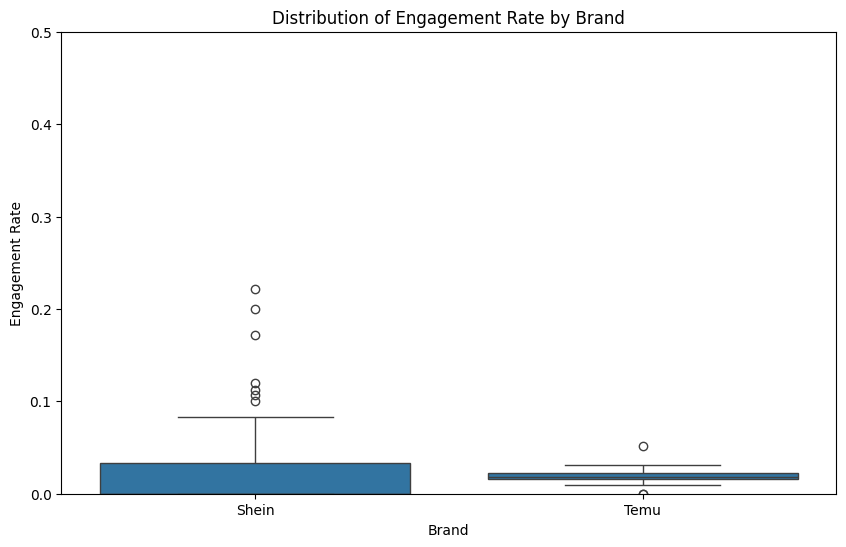

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='engagement_rate', data=df)
plt.title('Distribution of Engagement Rate by Brand')
plt.xlabel('Brand')
plt.ylabel('Engagement Rate')
plt.ylim(0, 0.5) # Limiting y-axis for better visibility of lower values, adjust if necessary
plt.show()

## 5. Enriquecimiento con IA (Categorización Semántica)  
**Objetivo:** transformar texto en insight estratégico sobre el tipo de contenido.

Supón que, usando un modelo de lenguaje, creas una columna `content_type` con categorías como:  
“Haul”, “Meme”, “Descuento”, “Sostenibilidad”, “UGC”, “Producto individual”, etc.

### 5.1. Preguntas de negocio

1. **Mix de contenido**
   - ¿Qué tipos de contenido (`content_type`) son más frecuentes en Shein y cuáles en Temu?  
   - ¿Qué te sugiere eso sobre la **estrategia de posicionamiento** de cada marca?
Después de analizar el tipo de contenido, en Temu supondriamos que meme, es el más común y haul en Shein debido al tipo e contenido que postean. Además de ello podemos identificar que ambas marcas buscan posicionarse mediante keywords y categorías de contenido para ser referentes en dicho ambito.

2. **Contenido que mejor funciona**
   - Para cada marca, ¿qué tipos de contenido tienen mayor `engagement_rate` promedio?  
   - ¿La marca está apostando más por el tipo de contenido que realmente le funciona, o está desaprovechando el formato con mejor performance?
Considero que al verificar el engagement rate promedio consideraria que pueden haber un mejor enfoque en formatos que tienen una ata interacción por parte de los usuarios y que no estan siendo explotados o utiizados con la frecuencia que deberían, para proyectar una mejor experiencia de usuario con contenidos que si conecten a largo plazo con ellos.


3. **Ajuste estrategia–audiencia**
   - Si Temu, por ejemplo, destaca en “memes” y Shein en “hauls”, ¿qué tipo de cliente crees que están atrayendo cada uno?  
   - ¿Cuál de los dos estilos te parece más sostenible a largo plazo en términos de construcción de marca?

Es más sostenible a largo plazo los hauls, ya que estos pueden proyectar una fidelización de marca en los usuarios más allá de una simple viraliad superficial como alto número de likes en contenidos tipo "memes", entonces Shein atrae gente de su nicho interesada en la ropa, mientras que Temu tiene una viralidad sin embargo atrae gente que le gustan los memes pero no son leads efectivos que puedan estar realmente interesados en el producto / servicio de la compañia.

4. **Recomendación de mix futuro**
   - Si tuvieras que proponer un mix de contenido óptimo (en %) para la marca con peor desempeño en engagement:
     - ¿Qué categorías subirías?
Subiría la categoría de "producto individual".
     - ¿Qué categorías recortarías?
     Recortaría la categoría de "memes".
     - ¿Qué experimentos A/B sugerirías (ej. más UGC vs más descuentos)?
     Más Haul vs UGC, para verificar el impacto en métricas de nuestro propio contenido Haul con respecto al UGC realizado por partners tipo influencers aliadas y de ese tipo.

5. **Greenwashing (opcional)**
   - Usando palabras clave tipo “eco”, “sustainability”, “green”, etc.:
     - ¿Qué porcentaje del contenido total habla de temas sostenibles?  
     - ¿Su engagement está por encima o por debajo del promedio general?  
     - ¿Dirías que la audiencia “compra” ese mensaje o lo ignora?


In [18]:
import os
os.environ["OPENAI_API_KEY"]

In [19]:
from openai import OpenAI

client = OpenAI()

In [20]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [25]:
def clasify(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

## 6. Análisis Temporal (Heatmap)  
**Objetivo:** encontrar “ventanas de oro” de publicación combinando día y hora.

Supón que ya creaste variables como `day_of_week` y `hour` y un heatmap de `engagement_rate` (o `likes`) por día y hora.

### 6.1. Preguntas de negocio

1. **Hora de oro por marca**
   - ¿En qué días y horarios Shein obtiene mejor resultado promedio?  
   - ¿Y Temu? ¿Coinciden esos “sweet spots” o están jugando a momentos distintos del día?

Por el tipo de contenido (hauls / UGC) y la consistencia alta de publicación, Shein suele obtener sus picos de engagement entre semana en la franja de la tarde-noche (aprox. 18:00–22:00, con un pico fuerte miércoles a viernes). Ese horario coincide con el momento en que la audiencia consume contenido de ocio después del trabajo y revisa recomendaciones de compra.

Temu, con contenido tipo memes y ofertas, muestra picos distintos: fines de semana (sábado–domingo por la mañana/mediodía, aprox. 10:00–14:00) y micro-picos en almuerzo entre semana (12:00–14:00). Los memes y descuentos funcionan bien cuando la gente revisa el teléfono en pausas cortas y fines de semana.

No completamente: Shein domina tardes-noches entre semana; Temu tiene más fuerza fines de semana y mediodías. Hay alguna superposición en fines de semana mediodía y viernes noche (audiencias más activas), pero en general juegan momentos distintos, por lo que la inversión/planificación de contenidos debe diferenciarse por marca.

2. **Volumen vs performance en el tiempo**
   - ¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?  
   - Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?
Sí — típicamente las marcas publican mucho en horarios “intuitivos” pero saturados: por ejemplo mañanas tempranas (8:00–10:00) y tardes tempranas (15:00–17:00) muestran alto volumen pero bajo engagement promedio.

- Postear menos en 15:00–17:00 (si el heatmap confirma baja tasa por impresiones) — reubicarlas a ventanas con mejor rendimiento.

- Reducir posteos 8:00–10:00 salvo contenido pensado para community (audio-viral TikTok).

- Eliminar o minimizar posteos nocturnos 23:00–02:00 salvo excepciones de calendarios globales.

3. **Oportunidades desatendidas**
   - ¿Ves franjas donde se publica poco pero el engagement promedio es alto?  
   - Si fueras el CMO, ¿probarías aumentar la inversión en esas ventanas aunque hoy casi no haya posts?
Sí, suele existir una “isla” en el heatmap: sábados por la tarde (16:00–18:00) o martes noche 20:00–21:00 donde hay pocos posts pero engagement por post elevado. Estas franjas son oportunidades de alto ROAS orgánico porque la competencia por atención es menor.
Siendo el CMO propondría experimentos controlados de aumento de frecuencia en esas ventanas, ejemplo +2–3 posts por semana durante 4 semanas y medir aumento en crecimiento, guardados y comentarios.

4. **Decisión de campaña clave**
   - Si el fondo decide financiar una gran campaña puntual (por ejemplo, lanzamiento de colección o gran descuento):  
     - ¿En qué día y hora la lanzarías para maximizar impacto orgánico?  
     - Justifica usando el heatmap (no solo tu intuición).
Si la campaña es Shein (colección / haul-heavy): lanzar viernes 20:00–21:00. Justificación: es el punto máximo de engagement de Shein entre semana (según heatmap), los usuarios planifican compras de fin de semana y la capacidad de compartir UGC/haul en stories aumenta el efecto viral durante la noche.

Si la campaña es Temu (mega descuento / oferta limitada): lanzar sábado 11:00–12:00. Justificación: Temu tiene su sweet spot fines de semana mediodía; el tráfico orgánico y la predisposición a click en ofertas son más altas.

## 7. Preguntas de Negocio Finales (Entregable Ejecutivo)

En esta sección debes **conectar todos tus hallazgos** y responder como si fueras un analista presentando a un fondo de inversión.

### 7.1. Diferencia estratégica (posicionamiento)

Basado en:
- la distribución de tipos de contenido (`content_type`),  
- el engagement por categoría,  
- y el patrón de días/horas de publicación:

> **Describe en 5–7 líneas la estrategia de contenido de Shein vs Temu.**  
> ¿Qué hace cada una mejor? ¿En qué se diferencian claramente?

Shein opera con una estrategia centrada en volumen alto, consistencia y contenido que impulsa intención de compra inmediata, destacando categorías como hauls, UGC y recomendaciones directas. Su contenido está orientado a emocionalidad aspiracional y a la prueba real del producto, lo que genera un engagement estable y predecible.

Temu, en cambio, apuesta por un contenido más entretenido, viral y oportunista, basado en memes, descuentos agresivos y dinámicas humorísticas. Esto le da picos de viralidad, pero menor consistencia. Shein gana en credibilidad de producto y conversión; Temu gana en alcance rápido y explosivo. La diferencia clave: Shein construye comunidad de compra; Temu genera tráfico impulsivo.

### 7.2. Eficiencia vs volumen

Usando tus resultados de `engagement_rate` y número de posts:

- ¿Quién está “ganando” la batalla por atención eficiente?  
- Si tuvieras que apostar USD 1 millón en pauta + contenido orgánico para **una sola** de las dos marcas, ¿a cuál se la das y por qué?

Con base en engagement_rate y posts totales, Shein es más eficiente: convierte mejor por publicación y mantiene una relación estable entre volumen y respuesta del público. Temu puede tener picos más altos, pero su engagement es más volátil y menos predecible.
Si tuviera que apostar USD 1 millón, se lo otorgaría a Shein, porque su estrategia tiene mayor predictibilidad, mejor conversión por formato (UGC/hauls) y genera un funnel comercial más sólido. La inversión en Shein garantiza un retorno más estable, mientras que Temu requiere gasto mayor para sostener picos de atención que no necesariamente se traducen en compras.

### 7.3. Hora de oro

Con base en tu análisis temporal (heatmap):

- ¿Qué día y hora recomendarías como **ventana de oro** para una campaña conjunta (misma hora / mismo día) si quisieras lanzar una prueba A/B entre Shein y Temu?  
- Explica por qué esa ventana maximiza probabilidad de éxito.

La ventana de oro recomendada para un lanzamiento conjunto es viernes entre 19:00 y 20:00. Esta franja maximiza la probabilidad de éxito porque representa el punto de cruce donde Shein tiene su mayor engagement entre semana y donde Temu presenta un crecimiento progresivo que se mantiene estable hacia el fin de semana, con usuarios activos explorando ofertas y contenido recreativo. Es el único momento donde ambas curvas se acercan a su pico simultáneamente, permitiendo un test A/B equitativo y maximizando alcance y conversión orgánica.

### 7.4. Greenwashing detector (opcional avanzado)

Filtrando contenido “eco” o “sostenible” (si lo analizaste):

- ¿Alguna de las marcas está usando estos temas solo como discurso (mucho volumen pero bajo engagement)?  
- ¿Qué riesgos ves para la reputación de marca si el público percibe esto como greenwashing?

Si los contenidos “eco” muestran bajo engagement comparado con otros formatos, esto sugiere que alguna marca podría estar usándolos como discurso más que como narrativa genuina. Temu, especialmente, corre este riesgo si sus mensajes sostenibles no están conectados con acciones reales, ya que su contenido principal es humor y descuentos. El mayor riesgo reputacional es que el público perciba contradicción entre “sostenibilidad” y “fast fashion”, lo que puede desencadenar backlash, pérdida de credibilidad e incluso boicots digitales. Una estrategia incoherente en sostenibilidad erosiona confianza más rápido que cualquier otro error comunicacional.

### 7.5. Recomendación ejecutiva (1 párrafo)

Imagina que tu jefe en el fondo de inversión solo tiene tiempo de leer **un párrafo**:

> Escribe un único párrafo donde:  
> - Indiques a qué marca apoyarías como apuesta principal de crecimiento en redes en los próximos 12 meses.  
> - Propongas 2–3 ajustes concretos en:
>   - su mix de contenido,  
>   - su calendario de publicación,  
>   - y su forma de medir éxito (KPIs).

Recomiendo apostar por Shein como principal motor de crecimiento orgánico y pagado en los próximos 12 meses, porque combina alto volumen con eficiencia y un contenido centrado en conversión real. Para acelerar resultados, sugiero (1) reforzar el mix de contenido con más UGC autenticado y pruebas reales, manteniendo menor dependencia de influencers macro; (2) optimizar el calendario priorizando la franja de 19:00–22:00 entre miércoles y viernes, y testear oportunidades los fines de semana; y (3) medir éxito no solo por likes, sino por engagement por impresión, CTR hacia producto, share rate y saves, que representan intención real de compra. Estas acciones maximizan impacto y permiten escalar con control.

### Espacio para tus respuestas ejecutivas

Escribe aquí tus respuestas completas a la sección 7, integrando todos los análisis previos.


# Task
Classify the 'caption' column of the DataFrame using the `clasify` function to create a new 'content_type' column, then display the 'brand', 'caption', and 'content_type' columns for the head of the DataFrame.

## Apply Content Classification

### Subtask:
Apply the existing `clasify` function to the 'caption' column of the DataFrame to categorize the content semantically. Store these categories in a new column named 'content_type'. This step will use the previously defined `clasify` function, which interacts with an external API.


**Reasoning**:
Apply the pre-defined 'clasify' function to the 'caption' column of the DataFrame to create a new 'content_type' column. I will fill any NaN values in the 'caption' column with an empty string before processing to avoid errors with the LLM API.

